# Propertly

This notebook will be demonstrating my work.

## #0.0 Import Libraries & Data

In [1]:
import pandas as pd
import numpy as np

import re

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

In [47]:
df_init = pd.read_csv('./data/iProperty_rent_to_be_cleaned.csv')

## #1a Exploratory Data Analysis

In [48]:
print("\033[1m", 'DataFrame :', "\033[0m")
df_init.head()

 DataFrame : 


,name,address,price,psf,description,bedroom,bathroom,carpark
0,"M Vertica, Taman Maluri, Cheras","Cheras, Kuala Lumpur","RM 1,400",(RM 1.65 per sq. ft.),Condominium • Built-up : 850 sq. ft. • Par...,3,2.0,1.0
1,"M Vertica, Taman Maluri, Cheras","Cheras, Kuala Lumpur","RM 1,700",(RM 2 per sq. ft.),Condominium • Built-up : 850 sq. ft. • Par...,3,2.0,2.0
2,"Desa Green, Taman Desa","Taman Desa, Kuala Lumpur","RM 1,800",(RM 2.52 per sq. ft.),Serviced Residence | Studio • Built-up : 715...,2,2.0,1.0
3,"Arcoris Residences, Mont Kiara","Mont Kiara, Kuala Lumpur","RM 5,000",(RM 5.51 per sq. ft.),Serviced Residence | Intermediate • Built-up...,2,2.0,1.0
4,"Desa Green, Taman Desa","Taman Desa, Kuala Lumpur","RM 1,400",(RM 2.42 per sq. ft.),Serviced Residence • Built-up : 578 sq. ft. ...,1,1.0,1.0


In [49]:
print("\033[1m", 'Shape of DataFrame :', "\033[0m", df_init.shape)

 Shape of DataFrame :  (11831, 8)


In [50]:
print("\033[1m", 'DataFrame data types :', "\033[0m")
df_init.dtypes

 DataFrame data types : 


name            object
address         object
price           object
psf             object
description     object
bedroom         object
bathroom       float64
carpark        float64
dtype: object

In [51]:
print("\033[1m", 'DataFrame empty cells :', "\033[0m")
df_init.isnull().sum()

 DataFrame empty cells : 


name              0
address           0
price             0
psf               1
description       0
bedroom          22
bathroom         22
carpark        1808
dtype: int64

In [52]:
print("\033[1m", 'DataFrame duplicate rows :', "\033[0m", len(df_init)-len(df_init.drop_duplicates()))

 DataFrame duplicate rows :  1027


In [53]:
for col in df_init.columns:
    print("\033[1m", col, "\033[0m")
    print(df_init[col].value_counts(),'\n')

 name 
Agile Mont Kiara, Mont Kiara                     120
Queens Waterfront, Bayan Lepas                   119
Ipoh                                              89
Conezion, IOI Resort City, Putrajaya              87
Pavilion Hilltop, Mont Kiara                      77
                                                ... 
Taman Camay, Ipoh                                  1
10 ROOMS MODERN SEMI D, Ipoh                       1
Taman Botani, Ipoh                                 1
Taman Botani, Ipoh, Ipoh                           1
Double Storey Semi-D House \ In Klebang, Ipoh      1
Name: name, Length: 3494, dtype: int64 

 address 
Ipoh, Perak                          1321
Johor Bahru, Johor                    819
Kuching, Sarawak                      629
Iskandar Puteri (Nusajaya), Johor     471
Putrajaya, Putrajaya                  453
                                     ... 
Bagan Serai, Perak                      1
Ulu Kinta, Perak                        1
Subang Bestari, Selango

**Notes**
1. 'Address' column can be further split into 'District'(eg. Ipoh, Johor Bahru) and 'State'(eg. Selangor, Sarawak).
2. 'Description' column can be further split into 'Type'(eg. Bungalow, Terrace), 'Details'(eg. Intermediate, Corner Lot), 'Area'(eg. 2,200 sqft, 1000sqft) and 'Furnish'(eg. Unfurnished, Partly furnished).
3. 'Bedroom' column should add up the numbers between the '+' sign and 'Studio' value should be handled carefully.
4. 'Carpark' column that are empty should be filled with 0.
5. Drop all other empty cells and duplicated cells.
6. Numerical columns ['price', 'psf', 'area', 'bedroom', 'bathroom', 'carpark'] should be formatted to int64 or float64 dtype.
7. String columns ['district','state','type','details','furnish'] should be one hot encoded.

## #2 Data Cleaning
For purpose, I've created a single function that cleans everything and placed it below under 'Archive'.

Run that cell on a DataFrame and it will returned a cleaned DataFrame for you.

### #2.0 Create a copy of DataFrame

In [54]:
df_cleaned = df_init.copy()

### #2.1 Dealing with empty values

In [55]:
print("\033[1m", 'Before :', "\033[0m")
df_cleaned.isnull().sum()

 Before : 


name              0
address           0
price             0
psf               1
description       0
bedroom          22
bathroom         22
carpark        1808
dtype: int64

In [56]:
print("\033[1m", 'After1 :', "\033[0m")
df_cleaned.carpark.fillna(0, inplace=True)
df_cleaned.isnull().sum()

 After1 : 


name            0
address         0
price           0
psf             1
description     0
bedroom        22
bathroom       22
carpark         0
dtype: int64

In [57]:
print("\033[1m", 'After2 :', "\033[0m")
df_cleaned.dropna(inplace=True)
df_cleaned.isnull().sum()

 After2 : 


name           0
address        0
price          0
psf            0
description    0
bedroom        0
bathroom       0
carpark        0
dtype: int64

### #2.2 Dealing with duplicate values

In [58]:
print("\033[1m", 'Before :', "\033[0m", df_cleaned.shape)

 Before :  (11808, 8)


In [59]:
df_cleaned.drop_duplicates(inplace=True)
print("\033[1m", 'After :', "\033[0m", df_cleaned.shape)

 After :  (10781, 8)


In [60]:
df_cleaned.reset_index(drop=True, inplace=True)

### #2.3 Dealing with 'address' column

In [61]:
print("\033[1m", 'Before :', "\033[0m", df_cleaned.shape)
df_cleaned.head()

 Before :  (10781, 8)


,name,address,price,psf,description,bedroom,bathroom,carpark
0,"M Vertica, Taman Maluri, Cheras","Cheras, Kuala Lumpur","RM 1,400",(RM 1.65 per sq. ft.),Condominium • Built-up : 850 sq. ft. • Par...,3,2.0,1.0
1,"M Vertica, Taman Maluri, Cheras","Cheras, Kuala Lumpur","RM 1,700",(RM 2 per sq. ft.),Condominium • Built-up : 850 sq. ft. • Par...,3,2.0,2.0
2,"Desa Green, Taman Desa","Taman Desa, Kuala Lumpur","RM 1,800",(RM 2.52 per sq. ft.),Serviced Residence | Studio • Built-up : 715...,2,2.0,1.0
3,"Arcoris Residences, Mont Kiara","Mont Kiara, Kuala Lumpur","RM 5,000",(RM 5.51 per sq. ft.),Serviced Residence | Intermediate • Built-up...,2,2.0,1.0
4,"Desa Green, Taman Desa","Taman Desa, Kuala Lumpur","RM 1,400",(RM 2.42 per sq. ft.),Serviced Residence • Built-up : 578 sq. ft. ...,1,1.0,1.0


In [62]:
if "district" not in df_cleaned.columns: 
    df_cleaned.insert(4, "district", None)
if "state" not in df_cleaned.columns: 
    df_cleaned.insert(5, "state", None)

if "address" in df_cleaned.columns:
    for x in df_cleaned.index:
        addr = df_cleaned.loc[x,'address'].split(',')
        df_cleaned.loc[x,'district'] = addr[0].strip()
        df_cleaned.loc[x,'state'] = addr[1].strip()
        
    df_cleaned.drop(['address'], axis=1, inplace=True)

print("\033[1m", 'After :', "\033[0m", df_cleaned.shape)
df_cleaned.head()

 After :  (10781, 9)


,name,price,psf,district,state,description,bedroom,bathroom,carpark
0,"M Vertica, Taman Maluri, Cheras","RM 1,400",(RM 1.65 per sq. ft.),Cheras,Kuala Lumpur,Condominium • Built-up : 850 sq. ft. • Par...,3,2.0,1.0
1,"M Vertica, Taman Maluri, Cheras","RM 1,700",(RM 2 per sq. ft.),Cheras,Kuala Lumpur,Condominium • Built-up : 850 sq. ft. • Par...,3,2.0,2.0
2,"Desa Green, Taman Desa","RM 1,800",(RM 2.52 per sq. ft.),Taman Desa,Kuala Lumpur,Serviced Residence | Studio • Built-up : 715...,2,2.0,1.0
3,"Arcoris Residences, Mont Kiara","RM 5,000",(RM 5.51 per sq. ft.),Mont Kiara,Kuala Lumpur,Serviced Residence | Intermediate • Built-up...,2,2.0,1.0
4,"Desa Green, Taman Desa","RM 1,400",(RM 2.42 per sq. ft.),Taman Desa,Kuala Lumpur,Serviced Residence • Built-up : 578 sq. ft. ...,1,1.0,1.0


### #2.4 Dealing with 'description' column

In [63]:
print("\033[1m", 'Before :', "\033[0m", df_cleaned.shape)
df_cleaned.head()

 Before :  (10781, 9)


,name,price,psf,district,state,description,bedroom,bathroom,carpark
0,"M Vertica, Taman Maluri, Cheras","RM 1,400",(RM 1.65 per sq. ft.),Cheras,Kuala Lumpur,Condominium • Built-up : 850 sq. ft. • Par...,3,2.0,1.0
1,"M Vertica, Taman Maluri, Cheras","RM 1,700",(RM 2 per sq. ft.),Cheras,Kuala Lumpur,Condominium • Built-up : 850 sq. ft. • Par...,3,2.0,2.0
2,"Desa Green, Taman Desa","RM 1,800",(RM 2.52 per sq. ft.),Taman Desa,Kuala Lumpur,Serviced Residence | Studio • Built-up : 715...,2,2.0,1.0
3,"Arcoris Residences, Mont Kiara","RM 5,000",(RM 5.51 per sq. ft.),Mont Kiara,Kuala Lumpur,Serviced Residence | Intermediate • Built-up...,2,2.0,1.0
4,"Desa Green, Taman Desa","RM 1,400",(RM 2.42 per sq. ft.),Taman Desa,Kuala Lumpur,Serviced Residence • Built-up : 578 sq. ft. ...,1,1.0,1.0


In [66]:
if "type" not in df_cleaned.columns: 
    df_cleaned.insert(5, "type", None)
if "details" not in df_cleaned.columns: 
    df_cleaned.insert(6, "details", None)
if "area" not in df_cleaned.columns: 
    df_cleaned.insert(7, "area", None)

if "description" in df_cleaned.columns:
    for x in df_cleaned.index:
        desc = df_cleaned.loc[x,'description'].split('\xa0•\xa0')
        df_cleaned.loc[x,'area'] = desc[1].strip()
        
        h_type = desc[0].strip().split(' | ')
        if len(h_type) >= 1:
            df_cleaned.loc[x,'type'] = h_type[0].strip()
        if len(h_type) >= 2:
            df_cleaned.loc[x,'details'] = h_type[1].strip()
        
    df_cleaned.drop(['description'], axis=1, inplace=True)

print("\033[1m", 'After :', "\033[0m", df_cleaned.shape)
df_cleaned.head()

 After :  (10781, 11)


,name,price,psf,district,state,type,details,area,bedroom,bathroom,carpark
0,"M Vertica, Taman Maluri, Cheras","RM 1,400",(RM 1.65 per sq. ft.),Cheras,Kuala Lumpur,Condominium,None,Built-up : 850 sq. ft.,3,2.0,1.0
1,"M Vertica, Taman Maluri, Cheras","RM 1,700",(RM 2 per sq. ft.),Cheras,Kuala Lumpur,Condominium,None,Built-up : 850 sq. ft.,3,2.0,2.0
2,"Desa Green, Taman Desa","RM 1,800",(RM 2.52 per sq. ft.),Taman Desa,Kuala Lumpur,Serviced Residence,Studio,Built-up : 715 sq. ft.,2,2.0,1.0
3,"Arcoris Residences, Mont Kiara","RM 5,000",(RM 5.51 per sq. ft.),Mont Kiara,Kuala Lumpur,Serviced Residence,Intermediate,Built-up : 907 sq. ft.,2,2.0,1.0
4,"Desa Green, Taman Desa","RM 1,400",(RM 2.42 per sq. ft.),Taman Desa,Kuala Lumpur,Serviced Residence,None,Built-up : 578 sq. ft.,1,1.0,1.0


### #2.5 Dealing with 'Studio' cells

In [67]:
print("\033[1m", 'Before :', "\033[0m")
df_cleaned[(df_cleaned['bedroom'] == 'Studio') | (df_cleaned['details'] == 'Studio')][:]

 Before : 


,name,price,psf,district,state,type,details,area,bedroom,bathroom,carpark
2,"Desa Green, Taman Desa","RM 1,800",(RM 2.52 per sq. ft.),Taman Desa,Kuala Lumpur,Serviced Residence,Studio,Built-up : 715 sq. ft.,2,2.0,1.0
27,"Service Suites @ Pavilion Embassy, Kampung Dat...","RM 4,200",(RM 3.83 per sq. ft.),Keramat,Kuala Lumpur,Serviced Residence,Studio,"Built-up : 1,098 sq. ft.",2,2.0,1.0
92,"Marc Residence, KLCC","RM 2,900",(RM 6.58 per sq. ft.),KLCC,Kuala Lumpur,Serviced Residence,Studio,Built-up : 441 sq. ft.,Studio,1.0,1.0
153,"Continew, KLCC","RM 1,800",(RM 3.9 per sq. ft.),KLCC,Kuala Lumpur,Serviced Residence,None,Built-up : 462 sq. ft.,Studio,1.0,0.0
190,"The Goodwood Residence, Bangsar South, Kampung...","RM 1,800",(RM 6 per sq. ft.),Kampung Kerinchi (Bangsar South),Kuala Lumpur,Condominium,None,Built-up : 300 sq. ft.,Studio,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
10500,"Liberty Grove, Kota Sentosa, Kuching","RM 1,200",(RM 1200 per sq. ft.),Kuching,Sarawak,None,None,None,Studio,1.0,1.0
10575,"TT3 Soho, Kuching","RM 1,100",(RM 3.67 per sq. ft.),Kuching,Sarawak,None,None,None,Studio,1.0,0.0
10625,"TT3 Soho, Kuching","RM 2,300",(RM 18.7 per sq. ft.),Kuching,Sarawak,None,None,None,Studio,1.0,0.0
10659,"Riverine Diamond, Kuching","RM 1,500",(RM 1500 per sq. ft.),Kuching,Sarawak,None,None,None,Studio,1.0,1.0


In [68]:
for x in df_cleaned.index:
    if 'Studio' in df_cleaned.loc[x,'bedroom']:
        df_cleaned.loc[x,'details'] = 'Studio'
        df_cleaned.loc[x,'bedroom'] = '1'
print("\033[1m", 'After :', "\033[0m")
df_cleaned[(df_cleaned['bedroom'] == 'Studio') | (df_cleaned['details'] == 'Studio')][:]

 After : 


,name,price,psf,district,state,type,details,area,bedroom,bathroom,carpark
2,"Desa Green, Taman Desa","RM 1,800",(RM 2.52 per sq. ft.),Taman Desa,Kuala Lumpur,Serviced Residence,Studio,Built-up : 715 sq. ft.,2,2.0,1.0
27,"Service Suites @ Pavilion Embassy, Kampung Dat...","RM 4,200",(RM 3.83 per sq. ft.),Keramat,Kuala Lumpur,Serviced Residence,Studio,"Built-up : 1,098 sq. ft.",2,2.0,1.0
92,"Marc Residence, KLCC","RM 2,900",(RM 6.58 per sq. ft.),KLCC,Kuala Lumpur,Serviced Residence,Studio,Built-up : 441 sq. ft.,1,1.0,1.0
153,"Continew, KLCC","RM 1,800",(RM 3.9 per sq. ft.),KLCC,Kuala Lumpur,Serviced Residence,Studio,Built-up : 462 sq. ft.,1,1.0,0.0
190,"The Goodwood Residence, Bangsar South, Kampung...","RM 1,800",(RM 6 per sq. ft.),Kampung Kerinchi (Bangsar South),Kuala Lumpur,Condominium,Studio,Built-up : 300 sq. ft.,1,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
10500,"Liberty Grove, Kota Sentosa, Kuching","RM 1,200",(RM 1200 per sq. ft.),Kuching,Sarawak,None,Studio,None,1,1.0,1.0
10575,"TT3 Soho, Kuching","RM 1,100",(RM 3.67 per sq. ft.),Kuching,Sarawak,None,Studio,None,1,1.0,0.0
10625,"TT3 Soho, Kuching","RM 2,300",(RM 18.7 per sq. ft.),Kuching,Sarawak,None,Studio,None,1,1.0,0.0
10659,"Riverine Diamond, Kuching","RM 1,500",(RM 1500 per sq. ft.),Kuching,Sarawak,None,Studio,None,1,1.0,1.0


### #2.6 Dealing with bedroom column

In [69]:
print("\033[1m", 'Before :', "\033[0m")
print(df_cleaned[['bedroom']].dtypes, '\n')
print(df_cleaned.bedroom.value_counts())

 Before : 
bedroom    object
dtype: object 

3       3887
4       1698
2       1688
1       1077
3+1      699
4+1      474
5        342
2+1      280
5+1      183
1+1      130
6        121
6+1       58
4+2       38
3+2       25
7         21
5+2       14
2+2        7
6+2        7
8          7
9          3
10         3
7+1        2
4+3        2
5+4        2
1+2        2
8+1        2
14         2
9+1        1
3+3        1
12         1
5+3        1
3+11       1
7+2        1
10+2       1
Name: bedroom, dtype: int64


In [70]:
for x in df_cleaned.index:
    rooms = df_cleaned.loc[x,'bedroom'].split('+')
    if len(rooms) == 1:
        df_cleaned.loc[x,'bedroom'] = int(rooms[0])
    if len(rooms) == 2:
        df_cleaned.loc[x,'bedroom'] = int(rooms[0]) + int(rooms[1])

print("\033[1m", 'After :', "\033[0m")
print(df_cleaned[['bedroom']].dtypes, '\n')
print(df_cleaned.bedroom.value_counts())

 After : 
bedroom    object
dtype: object 

3     4169
4     2404
2     1818
1     1077
5      841
6      343
7       95
8       17
9        8
10       4
14       3
12       2
Name: bedroom, dtype: int64


### #2.7 Dealing with details column

In [71]:
print("\033[1m", 'Before :', "\033[0m")
print('Number of empty cells :', df_cleaned.details.isnull().sum(), '\n')
print(df_cleaned.details.value_counts())

 Before : 
Number of empty cells : 7363 

Intermediate    1791
Corner lot       967
Studio           454
End lot          120
Duplex            46
Penthouse         25
Dual key          10
Soho               3
Triplex            2
Name: details, dtype: int64


In [72]:
df_cleaned.details.fillna('Default', inplace=True)
        
print("\033[1m", 'After :', "\033[0m")
print('Number of empty cells :', df_cleaned.details.isnull().sum(), '\n')
print(df_cleaned.details.value_counts())

 After : 
Number of empty cells : 0 

Default         7363
Intermediate    1791
Corner lot       967
Studio           454
End lot          120
Duplex            46
Penthouse         25
Dual key          10
Soho               3
Triplex            2
Name: details, dtype: int64


### #2.8 Extracting numeric value from price, psf and area

In [76]:
print("\033[1m", 'Before :', "\033[0m")
df_cleaned[['price','area','psf']].info()

 Before : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   price   10781 non-null  object
 1   area    7488 non-null   object
 2   psf     10781 non-null  object
dtypes: object(3)
memory usage: 252.8+ KB


In [80]:
for x in df_cleaned.index:
    df_cleaned.loc[x,'price'] = re.sub(r'\,','',df_cleaned.loc[x,'price'])
    df_cleaned.loc[x,'price'] = re.findall('\d+',df_cleaned.loc[x,'price'])[0]
    
    df_cleaned.loc[x,'psf'] = re.sub(r'\,','',df_cleaned.loc[x,'psf'])
    df_cleaned.loc[x,'psf'] = re.findall('\d+.?\d*',df_cleaned.loc[x,'psf'])[0]
    
    try:
        df_cleaned.loc[x,'area'] = re.sub(r'\,','',df_cleaned.loc[x,'area'])
        df_cleaned.loc[x,'area'] = re.findall('\d+',df_cleaned.loc[x,'area'])[0]
    except:
        continue
    
    
print("\033[1m", 'After :', "\033[0m")
df_cleaned[['price','area','psf']]

 After : 


,price,area,psf
0,1400,850,1.65
1,1700,850,2
2,1800,715,2.52
3,5000,907,5.51
4,1400,578,2.42
...,...,...,...
10776,1450,None,1.48
10777,2900,None,3.08
10778,1250,None,2.35
10779,3000,None,2.86


### #2.9 Converting data to the correct data type

In [81]:
print("\033[1m", 'Before :', "\033[0m")
df_cleaned.dtypes

 Before : 


name         object
price        object
psf          object
district     object
state        object
type         object
details      object
area         object
bedroom      object
bathroom    float64
carpark     float64
dtype: object

In [93]:
df_cleaned.area.fillna(pd.to_numeric(df_cleaned.area.dropna()).median(), inplace=True)

In [94]:
df_cleaned = df_cleaned.astype({'price':'int64','area':'int64','psf':'float64','bedroom':'int64','bathroom':'int64','carpark':'int64'})

print("\033[1m", 'After :', "\033[0m")
df_cleaned.dtypes

 After : 


name         object
price         int64
psf         float64
district     object
state        object
type         object
details      object
area          int64
bedroom       int64
bathroom      int64
carpark       int64
dtype: object

In [95]:
df_cleaned.head()

,name,price,psf,district,state,type,details,area,bedroom,bathroom,carpark
0,"M Vertica, Taman Maluri, Cheras",1400,1.65,Cheras,Kuala Lumpur,Condominium,Default,850,3,2,1
1,"M Vertica, Taman Maluri, Cheras",1700,2.00,Cheras,Kuala Lumpur,Condominium,Default,850,3,2,2
2,"Desa Green, Taman Desa",1800,2.52,Taman Desa,Kuala Lumpur,Serviced Residence,Studio,715,2,2,1
3,"Arcoris Residences, Mont Kiara",5000,5.51,Mont Kiara,Kuala Lumpur,Serviced Residence,Intermediate,907,2,2,1
4,"Desa Green, Taman Desa",1400,2.42,Taman Desa,Kuala Lumpur,Serviced Residence,Default,578,1,1,1


In [96]:
df_cleaned.to_csv('./data/iProperty_rent_to_be_trained.csv', index=False)

## #1b Exploratory Data Re-Analysis

### #1b.1 Numeric Data

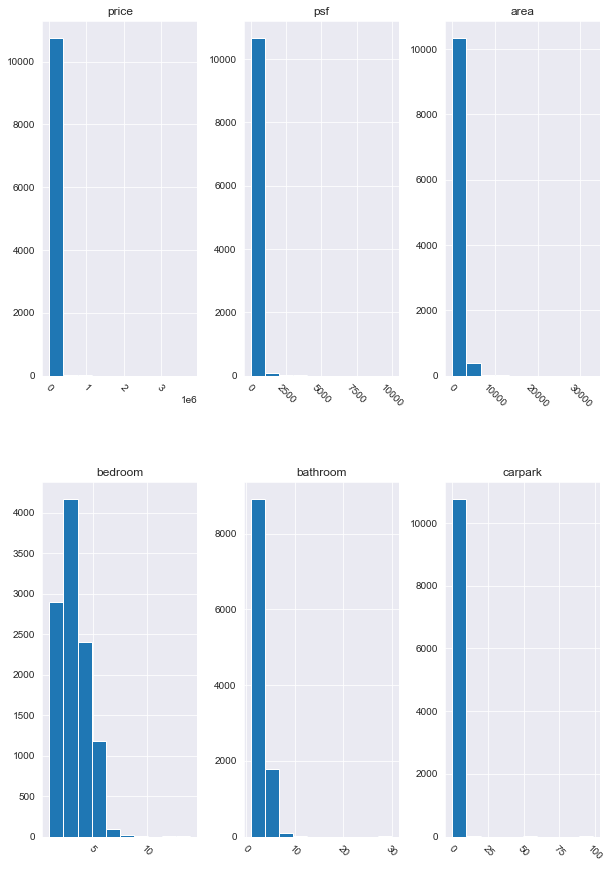

In [97]:
df_cleaned.hist(figsize=(10,15), xrot=-45, layout=(2,3))
plt.show()

In [98]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
price,10781.0,5684.784714,75581.749568,100.00,1500.00,2000.00,3000.00,3800000.0
psf,10781.0,26.651249,264.804785,0.05,1.21,1.76,2.55,10000.0
area,10781.0,1405.035340,1088.765106,1.00,998.00,1162.00,1400.00,33038.0
bedroom,10781.0,3.160931,1.279776,1.00,2.00,3.00,4.00,14.0
bathroom,10781.0,2.535294,1.254078,1.00,2.00,2.00,3.00,30.0
carpark,10781.0,1.465170,1.464742,0.00,1.00,1.00,2.00,99.0


**Notes**
- **Bedroom**, **Bathroom** and **Carpark** are discrete variables, but can be modeled as continuous variables
- **Price**, **Psf** and **Area** are continuous variables

In [99]:
cont_var = ['price','psf','area']
disc_var = ['bedroom','bathroom','carpark']

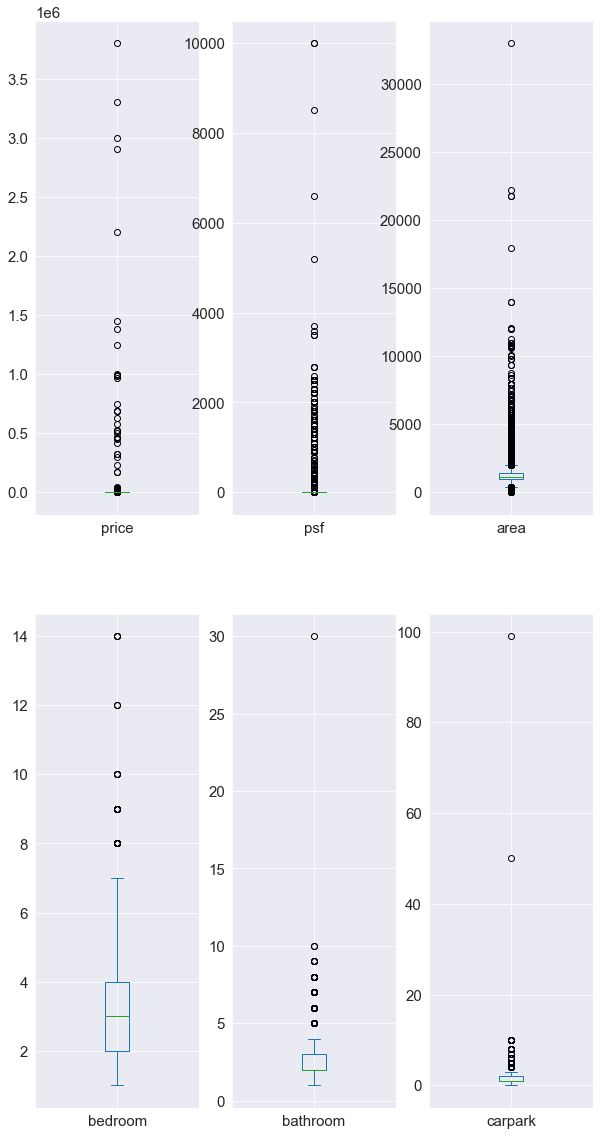

In [100]:
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

df_cleaned[cont_var+disc_var].plot(kind='box', subplots=True, figsize=(10,20), layout=(2,3))

plt.show()

**Notes**
- There are outliers especially in **Price** and **Area**

In [101]:
df_cleaned['calculated_price'] = df_cleaned.psf * df_cleaned.area
df_cleaned[['calculated_price']]

,calculated_price
0,1402.50
1,1700.00
2,1801.80
3,4997.57
4,1398.76
...,...
10776,1719.76
10777,3578.96
10778,2730.70
10779,3323.32


In [102]:
a = 0
b = df_cleaned.calculated_price - df_cleaned.price
for c in b:
    if abs(c) > a:
        a = c
print(a)

11610000.0


**Notes**
- There is no discrepancy between the calculated price and selling price

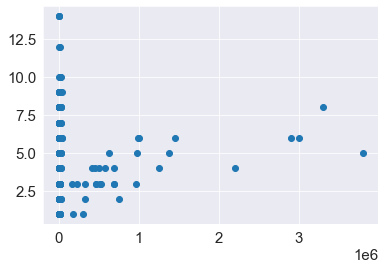

In [103]:
plt.scatter(x=df_cleaned['price'], y=df_cleaned['bedroom'])

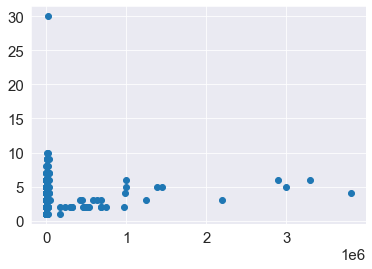

In [104]:
plt.scatter(x=df_cleaned['price'], y=df_cleaned['bathroom'])

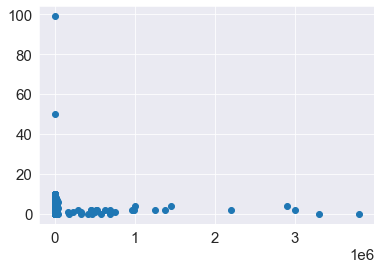

In [105]:
plt.scatter(x=df_cleaned['price'], y=df_cleaned['carpark'])

### #1b.2 Categorical Data

In [106]:
df_cleaned.describe(include=['object']).T

,count,unique,top,freq
name,10781,3479,Ipoh,83
district,10781,202,Ipoh,1234
state,10781,10,Selangor,1901
type,7488,15,Condominium,3061
details,10781,10,Default,7363


**Notes**
- 'Name' can be ignored as it has too many unique values

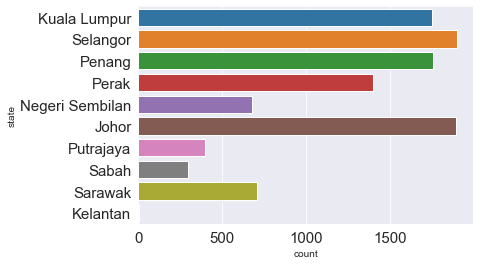

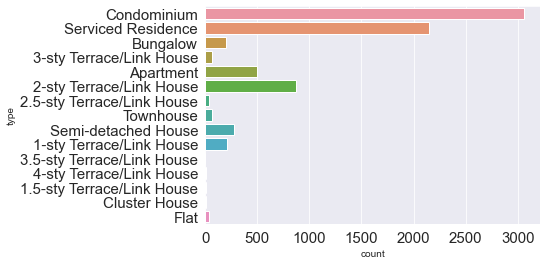

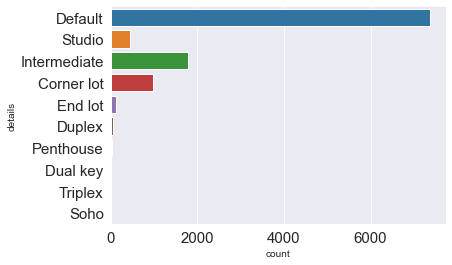

In [107]:
for feature in df_cleaned.dtypes[df_cleaned.dtypes == "object"].drop(["name","district"]).index:
    sns.countplot(y=feature, data=df_cleaned)
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Kuala Lumpur'),
  Text(1, 0, 'Selangor'),
  Text(2, 0, 'Penang'),
  Text(3, 0, 'Perak'),
  Text(4, 0, 'Negeri Sembilan'),
  Text(5, 0, 'Johor'),
  Text(6, 0, 'Putrajaya'),
  Text(7, 0, 'Sabah'),
  Text(8, 0, 'Sarawak'),
  Text(9, 0, 'Kelantan')])

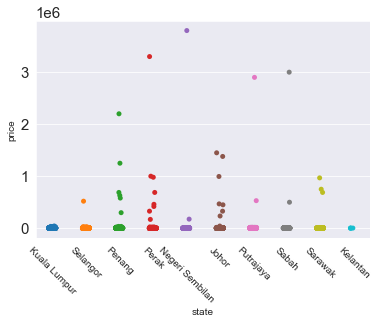

In [108]:
x = df_cleaned.state
y = df_cleaned.price

ax = sns.stripplot(x,y)

plt.xticks(rotation=-45, size=10)

### #1b.3 Correlation

In [109]:
correlation = df_cleaned.drop(['calculated_price','psf','area'], axis=1).corr()
correlation

,price,bedroom,bathroom,carpark
price,1.000000,0.069365,0.065236,0.011292
bedroom,0.069365,1.000000,0.826199,0.263611
bathroom,0.065236,0.826199,1.000000,0.222884
carpark,0.011292,0.263611,0.222884,1.000000


In [110]:
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = 1

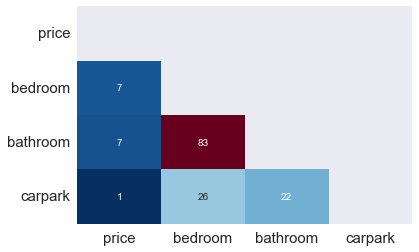

In [111]:
sns.heatmap(correlation*100, 
            cmap="RdBu_r", 
            annot=True, 
            fmt=".0f", 
            mask=mask,
            cbar=False
           )

plt.show()

## #3 Feature Engineering

In [112]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

### #3.0 Create a copy of DataFrame

In [113]:
df_train = pd.read_csv('./data/iProperty_rent_to_be_trained.csv')

### #3.1 Remove redundant columns

In [114]:
print("\033[1m", 'Before :', "\033[0m")
df_train.head()

 Before : 


,name,price,psf,district,state,type,details,area,bedroom,bathroom,carpark
0,"M Vertica, Taman Maluri, Cheras",1400,1.65,Cheras,Kuala Lumpur,Condominium,Default,850,3,2,1
1,"M Vertica, Taman Maluri, Cheras",1700,2.00,Cheras,Kuala Lumpur,Condominium,Default,850,3,2,2
2,"Desa Green, Taman Desa",1800,2.52,Taman Desa,Kuala Lumpur,Serviced Residence,Studio,715,2,2,1
3,"Arcoris Residences, Mont Kiara",5000,5.51,Mont Kiara,Kuala Lumpur,Serviced Residence,Intermediate,907,2,2,1
4,"Desa Green, Taman Desa",1400,2.42,Taman Desa,Kuala Lumpur,Serviced Residence,Default,578,1,1,1


In [115]:
df_train.drop(['name','psf','area'], axis=1, inplace=True)

print("\033[1m", 'After :', "\033[0m")
df_train.head()

 After : 


,price,district,state,type,details,bedroom,bathroom,carpark
0,1400,Cheras,Kuala Lumpur,Condominium,Default,3,2,1
1,1700,Cheras,Kuala Lumpur,Condominium,Default,3,2,2
2,1800,Taman Desa,Kuala Lumpur,Serviced Residence,Studio,2,2,1
3,5000,Mont Kiara,Kuala Lumpur,Serviced Residence,Intermediate,2,2,1
4,1400,Taman Desa,Kuala Lumpur,Serviced Residence,Default,1,1,1


### #3.2 Remove outliers

In [116]:
print("\033[1m", 'Before :', "\033[0m")
df_train.describe().T

 Before : 


,count,mean,std,min,25%,50%,75%,max
price,10781.0,5684.784714,75581.749568,100.0,1500.0,2000.0,3000.0,3800000.0
bedroom,10781.0,3.160931,1.279776,1.0,2.0,3.0,4.0,14.0
bathroom,10781.0,2.535294,1.254078,1.0,2.0,2.0,3.0,30.0
carpark,10781.0,1.465170,1.464742,0.0,1.0,1.0,2.0,99.0


In [117]:
for col in ['price']:
    q_low = df_train[col].quantile(0.01)
    q_hi  = df_train[col].quantile(0.99)
    df_train = df_train[(df_train[col] < q_hi) & (df_train[col] > q_low)]
    
print("\033[1m", 'After :', "\033[0m")
df_train.describe().T

 After : 


,count,mean,std,min,25%,50%,75%,max
price,10544.0,2594.700303,1980.674897,610.0,1500.0,2000.0,2900.0,14500.0
bedroom,10544.0,3.147667,1.244892,1.0,2.0,3.0,4.0,14.0
bathroom,10544.0,2.516597,1.193230,1.0,2.0,2.0,3.0,10.0
carpark,10544.0,1.457606,1.110044,0.0,1.0,1.0,2.0,50.0


### #3.3 One hot encode categorical columns

In [118]:
print("\033[1m", 'Before :', "\033[0m")
df_train

 Before : 


,price,district,state,type,details,bedroom,bathroom,carpark
0,1400,Cheras,Kuala Lumpur,Condominium,Default,3,2,1
1,1700,Cheras,Kuala Lumpur,Condominium,Default,3,2,2
2,1800,Taman Desa,Kuala Lumpur,Serviced Residence,Studio,2,2,1
3,5000,Mont Kiara,Kuala Lumpur,Serviced Residence,Intermediate,2,2,1
4,1400,Taman Desa,Kuala Lumpur,Serviced Residence,Default,1,1,1
...,...,...,...,...,...,...,...,...
10776,1450,Kuching,Sarawak,NaN,Default,2,2,1
10777,2900,Kota Bharu,Kelantan,NaN,Default,3,2,1
10778,1250,Kenali,Kelantan,NaN,Default,1,1,1
10779,3000,Kota Bharu,Kelantan,NaN,Default,3,2,2


In [119]:
one_hot = pd.get_dummies(df_train[['district','state','type','details']])
df_train = df_train.join(one_hot).drop(['district','state','type','details'], axis=1)

print("\033[1m", 'After :', "\033[0m")
df_train

 After : 


,price,bedroom,bathroom,carpark,district_Alma,district_Ampang,district_Ampang Hilir,district_Ara Damansara,district_Ayer Itam,district_Ayer Tawar,...,details_Corner lot,details_Default,details_Dual key,details_Duplex,details_End lot,details_Intermediate,details_Penthouse,details_Soho,details_Studio,details_Triplex
0,1400,3,2,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1700,3,2,2,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1800,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,5000,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1400,1,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10776,1450,2,2,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
10777,2900,3,2,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
10778,1250,1,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
10779,3000,3,2,2,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


### #3.4MinMaxScale numerical columns

In [120]:
print("\033[1m", 'Before :', "\033[0m")
display(df_train)
display(df_train.describe().T)

 Before : 


,price,bedroom,bathroom,carpark,district_Alma,district_Ampang,district_Ampang Hilir,district_Ara Damansara,district_Ayer Itam,district_Ayer Tawar,...,details_Corner lot,details_Default,details_Dual key,details_Duplex,details_End lot,details_Intermediate,details_Penthouse,details_Soho,details_Studio,details_Triplex
0,1400,3,2,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1700,3,2,2,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1800,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,5000,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1400,1,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10776,1450,2,2,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
10777,2900,3,2,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
10778,1250,1,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
10779,3000,3,2,2,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


,count,mean,std,min,25%,50%,75%,max
price,10544.0,2594.700303,1980.674897,610.0,1500.0,2000.0,2900.0,14500.0
bedroom,10544.0,3.147667,1.244892,1.0,2.0,3.0,4.0,14.0
bathroom,10544.0,2.516597,1.193230,1.0,2.0,2.0,3.0,10.0
carpark,10544.0,1.457606,1.110044,0.0,1.0,1.0,2.0,50.0
district_Alma,10544.0,0.000285,0.016866,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
details_Intermediate,10544.0,0.165971,0.372072,0.0,0.0,0.0,0.0,1.0
details_Penthouse,10544.0,0.001897,0.043513,0.0,0.0,0.0,0.0,1.0
details_Soho,10544.0,0.000285,0.016866,0.0,0.0,0.0,0.0,1.0
details_Studio,10544.0,0.042489,0.201711,0.0,0.0,0.0,0.0,1.0


In [121]:
for num in df_train.dtypes[(df_train.dtypes == "int64")].index:
    MMS = MinMaxScaler()
    MMS.fit(df_train[[num]])
    df_train[num] = MMS.transform(df_train[[num]])

print("\033[1m", 'After :', "\033[0m")
display(df_train)
display(df_train.describe().T)

 After : 


,price,bedroom,bathroom,carpark,district_Alma,district_Ampang,district_Ampang Hilir,district_Ara Damansara,district_Ayer Itam,district_Ayer Tawar,...,details_Corner lot,details_Default,details_Dual key,details_Duplex,details_End lot,details_Intermediate,details_Penthouse,details_Soho,details_Studio,details_Triplex
0,0.056875,0.153846,0.111111,0.02,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0.078474,0.153846,0.111111,0.04,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0.085673,0.076923,0.111111,0.02,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.316055,0.076923,0.111111,0.02,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.056875,0.000000,0.000000,0.02,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10776,0.060475,0.076923,0.111111,0.02,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
10777,0.164867,0.153846,0.111111,0.02,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
10778,0.046076,0.000000,0.000000,0.02,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
10779,0.172066,0.153846,0.111111,0.04,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


,count,mean,std,min,25%,50%,75%,max
price,10544.0,0.142887,0.142597,0.0,0.064075,0.100072,0.164867,1.0
bedroom,10544.0,0.165205,0.095761,0.0,0.076923,0.153846,0.230769,1.0
bathroom,10544.0,0.168511,0.132581,0.0,0.111111,0.111111,0.222222,1.0
carpark,10544.0,0.029152,0.022201,0.0,0.020000,0.020000,0.040000,1.0
district_Alma,10544.0,0.000285,0.016866,0.0,0.000000,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...
details_Intermediate,10544.0,0.165971,0.372072,0.0,0.000000,0.000000,0.000000,1.0
details_Penthouse,10544.0,0.001897,0.043513,0.0,0.000000,0.000000,0.000000,1.0
details_Soho,10544.0,0.000285,0.016866,0.0,0.000000,0.000000,0.000000,1.0
details_Studio,10544.0,0.042489,0.201711,0.0,0.000000,0.000000,0.000000,1.0


 ### #4 Algorithm Selection

Since our target (price) is a continuous numeric variable, we will be using **regression** to solve the problem:
- Linear Regression
- Decision Tree
- Random Forest
- Support Vector Machine
- K Neighbours

## #5 Model Training

In [122]:
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.pipeline import make_pipeline

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from yellowbrick.regressor import PredictionError, ResidualsPlot
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

### #5.0 Assigning X and y

In [123]:
X = df_train.drop(['price'],axis=1)
# display(X)
y = df_train['price']
# display(y)

### #5.1 Train Test Split X and y

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### #5.2 Building pipelines

In [125]:
SEED = 42

pipelines = {
    'Linear Regression': make_pipeline(StandardScaler(), LinearRegression()),
#     'Ridge': make_pipeline(StandardScaler(), Ridge(random_state=SEED)), 
#     'SGD': make_pipeline(StandardScaler(), SGDRegressor(random_state=SEED)), 
#     'Lasso': make_pipeline(StandardScaler(), Lasso(random_state=SEED)),
    'Decision Tree': make_pipeline(StandardScaler(), DecisionTreeRegressor(random_state=SEED)),
    'Random Forest': make_pipeline(StandardScaler(), RandomForestRegressor(random_state=SEED)),
    'Support Vector Machine': make_pipeline(StandardScaler(), SVR()),
    'K Neighbors': make_pipeline(StandardScaler(), KNeighborsRegressor()),
#     'Boosting': make_pipeline(StandardScaler(), AdaBoostRegressor(random_state=SEED)),
#     'Bagging': make_pipeline(StandardScaler(), BaggingRegressor(random_state=SEED)),
    'Gradient Boost': make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=SEED)),
    'Neural Network': make_pipeline(StandardScaler(), MLPRegressor(random_state=SEED)),
}

### #5.3 Find tubeable parameters

In [126]:
DecisionTreeRegressor().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [127]:
for model, pipeline in pipelines.items():
    print(model)
    display(pipeline.get_params())

Linear Regression


{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('linearregression', LinearRegression())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'linearregression': LinearRegression(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'linearregression__copy_X': True,
 'linearregression__fit_intercept': True,
 'linearregression__n_jobs': None,
 'linearregression__normalize': 'deprecated',
 'linearregression__positive': False}

Decision Tree


{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('decisiontreeregressor', DecisionTreeRegressor(random_state=42))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'decisiontreeregressor': DecisionTreeRegressor(random_state=42),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'decisiontreeregressor__ccp_alpha': 0.0,
 'decisiontreeregressor__criterion': 'squared_error',
 'decisiontreeregressor__max_depth': None,
 'decisiontreeregressor__max_features': None,
 'decisiontreeregressor__max_leaf_nodes': None,
 'decisiontreeregressor__min_impurity_decrease': 0.0,
 'decisiontreeregressor__min_samples_leaf': 1,
 'decisiontreeregressor__min_samples_split': 2,
 'decisiontreeregressor__min_weight_fraction_leaf': 0.0,
 'decisiontreeregressor__random_state': 42,
 'decisiontreeregressor__splitter': 'best'}

Random Forest


{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('randomforestregressor', RandomForestRegressor(random_state=42))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'randomforestregressor': RandomForestRegressor(random_state=42),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'randomforestregressor__bootstrap': True,
 'randomforestregressor__ccp_alpha': 0.0,
 'randomforestregressor__criterion': 'squared_error',
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 1.0,
 'randomforestregressor__max_leaf_nodes': None,
 'randomforestregressor__max_samples': None,
 'randomforestregressor__min_impurity_decrease': 0.0,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__min_weight_fraction_leaf': 0.0,
 'randomforestregressor__n_estimators': 100,
 'randomforestregressor__n_jobs': None,
 'randomforestregressor__oob_

Support Vector Machine


{'memory': None,
 'steps': [('standardscaler', StandardScaler()), ('svr', SVR())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'svr': SVR(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'svr__C': 1.0,
 'svr__cache_size': 200,
 'svr__coef0': 0.0,
 'svr__degree': 3,
 'svr__epsilon': 0.1,
 'svr__gamma': 'scale',
 'svr__kernel': 'rbf',
 'svr__max_iter': -1,
 'svr__shrinking': True,
 'svr__tol': 0.001,
 'svr__verbose': False}

K Neighbors


{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsregressor', KNeighborsRegressor())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsregressor': KNeighborsRegressor(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsregressor__algorithm': 'auto',
 'kneighborsregressor__leaf_size': 30,
 'kneighborsregressor__metric': 'minkowski',
 'kneighborsregressor__metric_params': None,
 'kneighborsregressor__n_jobs': None,
 'kneighborsregressor__n_neighbors': 5,
 'kneighborsregressor__p': 2,
 'kneighborsregressor__weights': 'uniform'}

Gradient Boost


{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('gradientboostingregressor', GradientBoostingRegressor(random_state=42))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'gradientboostingregressor': GradientBoostingRegressor(random_state=42),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'gradientboostingregressor__alpha': 0.9,
 'gradientboostingregressor__ccp_alpha': 0.0,
 'gradientboostingregressor__criterion': 'friedman_mse',
 'gradientboostingregressor__init': None,
 'gradientboostingregressor__learning_rate': 0.1,
 'gradientboostingregressor__loss': 'squared_error',
 'gradientboostingregressor__max_depth': 3,
 'gradientboostingregressor__max_features': None,
 'gradientboostingregressor__max_leaf_nodes': None,
 'gradientboostingregressor__min_impurity_decrease': 0.0,
 'gradientboostingregressor__min_samples_leaf': 1,
 'gradientboostingregressor__min_samples_split': 2,
 'gradientboostingregressor

Neural Network


{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('mlpregressor', MLPRegressor(random_state=42))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'mlpregressor': MLPRegressor(random_state=42),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'mlpregressor__activation': 'relu',
 'mlpregressor__alpha': 0.0001,
 'mlpregressor__batch_size': 'auto',
 'mlpregressor__beta_1': 0.9,
 'mlpregressor__beta_2': 0.999,
 'mlpregressor__early_stopping': False,
 'mlpregressor__epsilon': 1e-08,
 'mlpregressor__hidden_layer_sizes': (100,),
 'mlpregressor__learning_rate': 'constant',
 'mlpregressor__learning_rate_init': 0.001,
 'mlpregressor__max_fun': 15000,
 'mlpregressor__max_iter': 200,
 'mlpregressor__momentum': 0.9,
 'mlpregressor__n_iter_no_change': 10,
 'mlpregressor__nesterovs_momentum': True,
 'mlpregressor__power_t': 0.5,
 'mlpregressor__random_state': 42,
 'mlpregressor__shuffle': True,
 'mlpregressor__solver': 

In [130]:
lr_hyperparameters = {}

ridge_hyperparameters = {}

sgd_hyperparameters = {}

lasso_hyperparameters = {}

dt_hyperparameters = {
    'decisiontreeregressor__max_depth': [3,4,5,6,7],
    'decisiontreeregressor__max_leaf_nodes': [2,3,4,5],
    'decisiontreeregressor__max_features': ["sqrt"],
}

rf_hyperparameters = {
    'randomforestregressor__max_depth': [3,4,5,6,7],
    'randomforestregressor__max_leaf_nodes': [2,3,4,5],
    'randomforestregressor__n_estimators' : [100, 200],
    'randomforestregressor__max_features' : ["sqrt"],
}

svr_hyperparamters = {}

kn_hyperparameters = {}

boo_hyperparamater = {}

bag_hyperparameter = {}

gb_hyperparameters = {
    'gradientboostingregressor__n_estimators' : [100, 200],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth' : [1, 3, 5],
}

nn_hyperparameters = {'mlpregressor__hidden_layer_sizes' : [(80,40,20,10),(40,20,10),(20,10)]}

hyperparameters = {
    'Linear Regression': lr_hyperparameters,
    'Ridge': ridge_hyperparameters,
    'SGD': sgd_hyperparameters,
    'Lasso': lasso_hyperparameters,
    'Decision Tree': dt_hyperparameters,
    'Random Forest': rf_hyperparameters,
    'Support Vector Machine': svr_hyperparamters,
    'K Neighbors': kn_hyperparameters,
    'Boosting': boo_hyperparamater,
    'Bagging': bag_hyperparameter,
    'Gradient Boost': gb_hyperparameters,
    'Neural Network': nn_hyperparameters,
}

### #5.4 Fit and tune models with cross validation

In [131]:
fitted_model = {}

for name, pipeline in pipelines.items():
    print(name)
    model = GridSearchCV(pipeline, hyperparameters[name], cv=5, n_jobs=-1, verbose=4)
    model.fit(X_train, y_train)
    
    fitted_model[name] = model
    print('==='*20)

Linear Regression
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Decision Tree
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Random Forest
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Support Vector Machine
Fitting 5 folds for each of 1 candidates, totalling 5 fits
K Neighbors
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Gradient Boost
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Neural Network
Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [132]:
for model, pipeline in fitted_model.items():
    print(model)
    display(pipeline.get_params())

Linear Regression


{'cv': 5,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('standardscaler', StandardScaler()),
  ('linearregression', LinearRegression())],
 'estimator__verbose': False,
 'estimator__standardscaler': StandardScaler(),
 'estimator__linearregression': LinearRegression(),
 'estimator__standardscaler__copy': True,
 'estimator__standardscaler__with_mean': True,
 'estimator__standardscaler__with_std': True,
 'estimator__linearregression__copy_X': True,
 'estimator__linearregression__fit_intercept': True,
 'estimator__linearregression__n_jobs': None,
 'estimator__linearregression__normalize': 'deprecated',
 'estimator__linearregression__positive': False,
 'estimator': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('linearregression', LinearRegression())]),
 'n_jobs': -1,
 'param_grid': {},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 4}

Decision Tree


{'cv': 5,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('standardscaler', StandardScaler()),
  ('decisiontreeregressor', DecisionTreeRegressor(random_state=42))],
 'estimator__verbose': False,
 'estimator__standardscaler': StandardScaler(),
 'estimator__decisiontreeregressor': DecisionTreeRegressor(random_state=42),
 'estimator__standardscaler__copy': True,
 'estimator__standardscaler__with_mean': True,
 'estimator__standardscaler__with_std': True,
 'estimator__decisiontreeregressor__ccp_alpha': 0.0,
 'estimator__decisiontreeregressor__criterion': 'squared_error',
 'estimator__decisiontreeregressor__max_depth': None,
 'estimator__decisiontreeregressor__max_features': None,
 'estimator__decisiontreeregressor__max_leaf_nodes': None,
 'estimator__decisiontreeregressor__min_impurity_decrease': 0.0,
 'estimator__decisiontreeregressor__min_samples_leaf': 1,
 'estimator__decisiontreeregressor__min_samples_split': 2,
 'estimator__decisiontreeregressor__min_weight_frac

Random Forest


{'cv': 5,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('standardscaler', StandardScaler()),
  ('randomforestregressor', RandomForestRegressor(random_state=42))],
 'estimator__verbose': False,
 'estimator__standardscaler': StandardScaler(),
 'estimator__randomforestregressor': RandomForestRegressor(random_state=42),
 'estimator__standardscaler__copy': True,
 'estimator__standardscaler__with_mean': True,
 'estimator__standardscaler__with_std': True,
 'estimator__randomforestregressor__bootstrap': True,
 'estimator__randomforestregressor__ccp_alpha': 0.0,
 'estimator__randomforestregressor__criterion': 'squared_error',
 'estimator__randomforestregressor__max_depth': None,
 'estimator__randomforestregressor__max_features': 1.0,
 'estimator__randomforestregressor__max_leaf_nodes': None,
 'estimator__randomforestregressor__max_samples': None,
 'estimator__randomforestregressor__min_impurity_decrease': 0.0,
 'estimator__randomforestregressor__min_samples_leaf': 1,
 

Support Vector Machine


{'cv': 5,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('standardscaler', StandardScaler()), ('svr', SVR())],
 'estimator__verbose': False,
 'estimator__standardscaler': StandardScaler(),
 'estimator__svr': SVR(),
 'estimator__standardscaler__copy': True,
 'estimator__standardscaler__with_mean': True,
 'estimator__standardscaler__with_std': True,
 'estimator__svr__C': 1.0,
 'estimator__svr__cache_size': 200,
 'estimator__svr__coef0': 0.0,
 'estimator__svr__degree': 3,
 'estimator__svr__epsilon': 0.1,
 'estimator__svr__gamma': 'scale',
 'estimator__svr__kernel': 'rbf',
 'estimator__svr__max_iter': -1,
 'estimator__svr__shrinking': True,
 'estimator__svr__tol': 0.001,
 'estimator__svr__verbose': False,
 'estimator': Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())]),
 'n_jobs': -1,
 'param_grid': {},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 4}

K Neighbors


{'cv': 5,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('standardscaler', StandardScaler()),
  ('kneighborsregressor', KNeighborsRegressor())],
 'estimator__verbose': False,
 'estimator__standardscaler': StandardScaler(),
 'estimator__kneighborsregressor': KNeighborsRegressor(),
 'estimator__standardscaler__copy': True,
 'estimator__standardscaler__with_mean': True,
 'estimator__standardscaler__with_std': True,
 'estimator__kneighborsregressor__algorithm': 'auto',
 'estimator__kneighborsregressor__leaf_size': 30,
 'estimator__kneighborsregressor__metric': 'minkowski',
 'estimator__kneighborsregressor__metric_params': None,
 'estimator__kneighborsregressor__n_jobs': None,
 'estimator__kneighborsregressor__n_neighbors': 5,
 'estimator__kneighborsregressor__p': 2,
 'estimator__kneighborsregressor__weights': 'uniform',
 'estimator': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('kneighborsregressor', KNeighborsRegressor())]),
 'n_jobs': -

Gradient Boost


{'cv': 5,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('standardscaler', StandardScaler()),
  ('gradientboostingregressor', GradientBoostingRegressor(random_state=42))],
 'estimator__verbose': False,
 'estimator__standardscaler': StandardScaler(),
 'estimator__gradientboostingregressor': GradientBoostingRegressor(random_state=42),
 'estimator__standardscaler__copy': True,
 'estimator__standardscaler__with_mean': True,
 'estimator__standardscaler__with_std': True,
 'estimator__gradientboostingregressor__alpha': 0.9,
 'estimator__gradientboostingregressor__ccp_alpha': 0.0,
 'estimator__gradientboostingregressor__criterion': 'friedman_mse',
 'estimator__gradientboostingregressor__init': None,
 'estimator__gradientboostingregressor__learning_rate': 0.1,
 'estimator__gradientboostingregressor__loss': 'squared_error',
 'estimator__gradientboostingregressor__max_depth': 3,
 'estimator__gradientboostingregressor__max_features': None,
 'estimator__gradientboostingregr

Neural Network


{'cv': 5,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('standardscaler', StandardScaler()),
  ('mlpregressor', MLPRegressor(random_state=42))],
 'estimator__verbose': False,
 'estimator__standardscaler': StandardScaler(),
 'estimator__mlpregressor': MLPRegressor(random_state=42),
 'estimator__standardscaler__copy': True,
 'estimator__standardscaler__with_mean': True,
 'estimator__standardscaler__with_std': True,
 'estimator__mlpregressor__activation': 'relu',
 'estimator__mlpregressor__alpha': 0.0001,
 'estimator__mlpregressor__batch_size': 'auto',
 'estimator__mlpregressor__beta_1': 0.9,
 'estimator__mlpregressor__beta_2': 0.999,
 'estimator__mlpregressor__early_stopping': False,
 'estimator__mlpregressor__epsilon': 1e-08,
 'estimator__mlpregressor__hidden_layer_sizes': (100,),
 'estimator__mlpregressor__learning_rate': 'constant',
 'estimator__mlpregressor__learning_rate_init': 0.001,
 'estimator__mlpregressor__max_fun': 15000,
 'estimator__mlpregressor__ma

In [133]:
for key, value in fitted_model.items():
    print(key, type(value))

Linear Regression <class 'sklearn.model_selection._search.GridSearchCV'>
Decision Tree <class 'sklearn.model_selection._search.GridSearchCV'>
Random Forest <class 'sklearn.model_selection._search.GridSearchCV'>
Support Vector Machine <class 'sklearn.model_selection._search.GridSearchCV'>
K Neighbors <class 'sklearn.model_selection._search.GridSearchCV'>
Gradient Boost <class 'sklearn.model_selection._search.GridSearchCV'>
Neural Network <class 'sklearn.model_selection._search.GridSearchCV'>


In [134]:
for name, model in fitted_model.items():
    print(name,', Train Score :', model.score(X_train,y_train))
    print(name,', Test Score :', model.score(X_test,y_test))
    print('')

Linear Regression , Train Score : 0.6537228143239577
Linear Regression , Test Score : -8.652666495928321e+22

Decision Tree , Train Score : 0.21401647350872344
Decision Tree , Test Score : 0.2374390277413384

Random Forest , Train Score : 0.33376161588718734
Random Forest , Test Score : 0.3449296821917669

Support Vector Machine , Train Score : 0.7269202113631035
Support Vector Machine , Test Score : 0.6993471991707021

K Neighbors , Train Score : 0.7766883967497731
K Neighbors , Test Score : 0.7083913546207257

Gradient Boost , Train Score : 0.8427505570012261
Gradient Boost , Test Score : 0.7883815078055231

Neural Network , Train Score : 0.7677731164103864
Neural Network , Test Score : 0.6764633253290202



In [135]:
for name, model in fitted_model.items():
    pred = model.predict(X_test)
    print("\033[1m", name, "\033[0m")
    print( 'R^2:', r2_score(y_test, pred ))
    print( 'RMSE:', mean_squared_error(y_test, pred, squared=False))
    print( 'MAE:', mean_absolute_error(y_test, pred))
    print('MAPE:', mean_absolute_percentage_error(y_test, pred))
    
    print('==='*20, '\n')

 Linear Regression 
R^2: -8.652666495928321e+22
RMSE: 43357512542.61994
MAE: 1703650012.5213337
MAPE: 138856489025.01398

 Decision Tree 
R^2: 0.2374390277413384
RMSE: 0.12871425970049266
MAE: 0.084529773198026
MAPE: 271406237373.61423

 Random Forest 
R^2: 0.3449296821917669
RMSE: 0.1192980477365705
MAE: 0.0767892207740268
MAPE: 278365168366.1521

 Support Vector Machine 
R^2: 0.6993471991707021
RMSE: 0.08082058748466597
MAE: 0.05616018860993828
MAPE: 328379927405.0277

 K Neighbors 
R^2: 0.7083913546207257
RMSE: 0.07959569399785764
MAE: 0.04642619429705936
MAPE: 155275280634.49582

 Gradient Boost 
R^2: 0.7883815078055231
RMSE: 0.06780569687973562
MAE: 0.041776660585305304
MAPE: 82252730749.35233

 Neural Network 
R^2: 0.6764633253290202
RMSE: 0.08383997395693153
MAE: 0.05093269009483443
MAPE: 128005104852.3039



In [ ]:
# Using Yellowbrick
for name, model in fitted_model.items():
    pred = model.predict(X_test.values)
    print("\033[1m", name, "\033[0m")
    visualizer1 = PredictionError(model, title=('Prediction Error for:'+name))
    visualizer1.fit(X_train, y_train)  
    visualizer1.score(X_test.values, y_test.values)  
    visualizer1.poof()
    
    visualizer2 = PredictionError(model, title=('Residual for:'+name))
    visualizer2.fit(X_train, y_train)  
    visualizer2.score(X_test, y_test)  
    visualizer2.poof()
    
    print('==='*20, '\n')

In [ ]:
# Using matplotlib
for name, model in fitted_model.items():
    pred = model.predict(X_test)
    print("\033[1m", name, "\033[0m")
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_aspect('equal', adjustable='box')
    plt.scatter(pred, y_test)
    plt.xlim(-0.3,1)
    plt.ylim(-0.3,1)
    plt.show()

### #6 Key Takeaways

### #Z Archive